In [10]:
from scipy.special import zeta
from random import randint
from math import gcd, pi
from functools import reduce
import numpy as np

In [5]:
def coprime(n, to):
    l = [randint(1, to) for i in range(n)]
    coprime = int(reduce(gcd, l) == 1)
    return coprime

In [3]:
results = []
max_int = 200
trial_n = 10000

for to in range(2, max_int+1):
    trial = np.mean([coprime(n = 2, to = to) for x in range(trial_n)])
    results.append((to, trial))

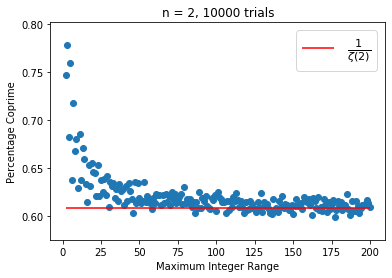

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*zip(*results))
plt.title(f"n = 2, {trial_n} trials")
plt.xlabel("Maximum Integer Range")
plt.ylabel("Percentage Coprime")
plt.hlines(y = 1/zeta(2), xmin = 2, xmax=max_int, 
           colors='red', label = r'$\frac{1}{\zeta(2)}$')
plt.legend(prop={'size': 16})
plt.savefig("plot_zeta.png", dpi=600)
plt.show()

In [7]:
results = []
max_int = 200
trial_n = 10000

for n in range(2, 6):
    for to in range(2, max_int+1):
        trial = np.mean([coprime(n = n, to = to) for x in range(trial_n)])
        results.append((to, trial, n))

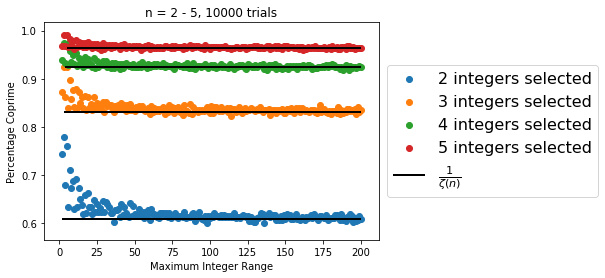

In [9]:
for n in range(2, 6):
    filt = filter(lambda x: x[2]==n, results)
    x, y, _ = zip(*filt)
    plt.scatter(x, y, label = f"{n} integers selected")

plt.title(f"n = 2 - 5, {trial_n} trials")
plt.xlabel("Maximum Integer Range")
plt.ylabel("Percentage Coprime")
plt.hlines(y = [1/zeta(x) for x in range(2,6)], xmin = range(2,6), xmax=max_int, 
           colors='black', label = r'$\frac{1}{\zeta(n)}$', linewidth=2)
plt.legend(prop={'size': 16}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plot_zeta_2.png", dpi=600, bbox_inches='tight')
plt.show()